# Grad NN Final Project

### Prelude

Here is the code for loading and cleaning up the dataset.

In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Data = pd.read_csv("german_credit_data.csv")
Data['Saving accounts'] = Data['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
Data['Saving accounts'] = Data['Saving accounts'].fillna(Data['Saving accounts'].dropna().mean())

Data['Checking account'] = Data['Checking account'].map({"little":0,"moderate":1,"rich":2 });
Data['Checking account'] = Data['Checking account'].fillna(Data['Checking account'].dropna().mean())

Data['race'] = Data['race'].map({"black":0,"white":1}).astype(float)

Data['Housing'] = Data['Housing'].map({"own":0,"free":1,"rent":2}).astype(float)

Data['Purpose'] = Data['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float)

Data['Risk'] = Data['Risk'].map({"good":0,"bad":1}).astype(float)
Data = Data.drop(columns=['Unnamed: 0'])
Data.head(10)'''

import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.mode.chained_assignment = None # muting a trivial warning about PANDAS, don't worry about this
df = pd.read_csv('compas-scores-two-years.csv')
df_cleaned = df.loc[(df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30) 
              & (df['is_recid'] != -1) & (df['c_charge_degree'] != "O") & (df['score_text'] != 'N/A')]
df_filtered = df_cleaned[['age','sex', 'race', 'juv_fel_count', 'decile_score', 'priors_count', 'is_recid', 'is_violent_recid', 
                   'v_decile_score']]
df_final = df_filtered.join(pd.get_dummies(df_filtered['race']))
df_final["sex"] = (df_final["sex"] == "Male") + 0 ## Use the binary coding for sex.

Data = df_final

Data_wb = Data[(Data['African-American'] | Data['Caucasian']) == 1]

Data = Data_wb
#print (len(Data))

Data = Data.drop(columns=['Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other', 'race', 'is_violent_recid'])

Data = Data.rename(columns={'African-American': 'race'})
Data.head(10)

,age,sex,juv_fel_count,decile_score,priors_count,is_recid,v_decile_score,race
1,34,1,0,3,0,1,1,1
2,24,1,0,4,4,1,3,1
6,41,1,0,6,14,1,2,0
8,39,0,0,1,0,0,1,0
10,27,1,0,4,0,0,4,0
11,23,1,0,6,3,1,4,1
12,37,0,0,1,0,0,1,0
13,41,1,0,4,0,0,2,1
14,47,0,0,1,1,1,1,0
15,31,1,0,3,7,1,2,1


In [461]:
q = df_final[df_final['African-American'] == 1]
print (len(q))
w = df_final[df_final['Caucasian'] == 1]
print (len(w))

print (len(Data))

3175
2103
5278


And here is the code for performing a train-test split, training a logistic regression model, and computing the test accuracy.

In [462]:
X = Data.drop(columns=["is_recid", "race"])
Y = Data['is_recid']

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=137)

tempX = Data.drop(columns=["is_recid"])
tempY = Data['is_recid']

temptrain_x, temptest_x, temptrain_y, temptest_y = train_test_split(tempX, tempY, test_size=0.2, random_state=137)


# whiteS ARE 0
# blackS ARE 1

#test_x['index'] = range(1, len(test_x) + 1)

test_x_black = test_x[temptest_x['race'] == 1]
test_y_black = test_y[temptest_x['race'] == 1]

test_x_white = test_x[temptest_x['race'] == 0]
test_y_white = test_y[temptest_x['race'] == 0]

train_x_black = train_x[temptrain_x['race'] == 1]
train_x_white = train_x[temptrain_x['race'] == 0]








In [487]:
temptest_x.head()

,age,sex,juv_fel_count,decile_score,priors_count,v_decile_score,race
4734,30,1,3,4,4,4,0
1421,26,1,0,4,3,2,1
242,31,1,0,8,0,5,0
393,27,1,0,8,12,5,1
3986,34,0,0,5,3,2,0


In [463]:
q = len(temptrain_x[temptrain_x['race'] == 1])

w = len(temptrain_x[temptrain_x['race'] == 0])

race1weight = 1 - (q/(q+w))
race0weight = 1 - (w/(q+w))

print ("Weight for race label 1: ", race1weight)
print ("Weight for race label 0: ", race0weight)

e = len(temptrain_y[temptrain_y == 1])
r = len(temptrain_y[temptrain_y == 0])

risk1weight = 1 - (e/(e+r))
risk0weight = 1 - (r/(e+r))

print ("Weight for risk label 1: ", risk1weight)
print ("Weight for risk label 0: ", risk0weight)


Weight for race label 1:  0.396257697773567
Weight for race label 0:  0.603742302226433
Weight for risk label 1:  0.4971577451444813
Weight for risk label 0:  0.5028422548555187


In [464]:
# Getting low risk/high risk data

test_x_black_lowrisk = test_x_black[test_y_black == 0]
test_y_black_lowrisk = test_y_black[test_y_black == 0]

test_x_black_highrisk = test_x_black[test_y_black == 1]
test_y_black_highrisk = test_y_black[test_y_black == 1]

test_x_white_lowrisk = test_x_white[test_y_white == 0]
test_y_white_lowrisk = test_y_white[test_y_white == 0]

test_x_white_highrisk = test_x_white[test_y_white == 1]
test_y_white_highrisk = test_y_white[test_y_white == 1]

In [465]:
import torch
class Dataset(torch.utils.data.Dataset):
    
    # Create Torch Dataset object.
    def __init__(self, X, Y):

        #X = X.reshape((-1, 1, 64, 64))  
        #self.X = torch.from_numpy(X)
        #self.Y = torch.from_numpy(Y)
        self.X = X
        self.Y = Y
        
    def __len__(self):
        return len(self.Y)

    def __getitem__(self, index):
        X = self.X[index]
        Y = self.Y[index]

        return {'X': X, 'Y': Y}

In [466]:
def train(epoch, net, trainDataLoader, optimizer, criterion, validDataLoader):
    net.train()
    train_loss = 0
    for sample in trainDataLoader:
        inputs, targets = sample['X'], sample['Y']
        #print (inputs, targets)
        optimizer.zero_grad()
        outputs = net.forward(inputs)
        #print ("outputs/targets", outputs, targets)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_size

    net.eval()
    valid_loss = 0
    for sample in validDataLoader:
        inputs, targets = sample['X'], sample['Y']
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        valid_loss += loss.item() * batch_size

    # calculate average losses
    train_loss = train_loss/len(trainDataLoader.sampler)
    valid_loss = valid_loss/len(validDataLoader.sampler)

    if epoch % 1 == 0:
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
    return train_loss, valid_loss


In [467]:
import torch
from torch.autograd import Variable
import sklearn
import numpy as np

scaler = sklearn.preprocessing.StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
test_x_black = scaler.transform(test_x_black)
test_x_white = scaler.transform(test_x_white)
train_x_black = scaler.transform(train_x_black)
train_x_white = scaler.transform(train_x_white)
test_x_black_highrisk = scaler.transform(test_x_black_highrisk)
test_x_black_lowrisk = scaler.transform(test_x_black_lowrisk)
test_x_white_highrisk = scaler.transform(test_x_white_highrisk)
test_x_white_lowrisk = scaler.transform(test_x_white_lowrisk)


train_x = torch.from_numpy(train_x.astype(np.float32))
test_x = torch.from_numpy(test_x.astype(np.float32))
test_x_black = torch.from_numpy(test_x_black.astype(np.float32))
test_x_white = torch.from_numpy(test_x_white.astype(np.float32))
train_x_black = torch.from_numpy(train_x_black.astype(np.float32))
train_x_white = torch.from_numpy(train_x_white.astype(np.float32))
test_x_black_highrisk = torch.from_numpy(test_x_black_highrisk.astype(np.float32))
test_x_black_lowrisk = torch.from_numpy(test_x_black_lowrisk.astype(np.float32))
test_x_white_highrisk = torch.from_numpy(test_x_white_highrisk.astype(np.float32))
test_x_white_lowrisk = torch.from_numpy(test_x_white_lowrisk.astype(np.float32))



# Train_y is now a numpy object 
train_y = list(train_y)

# train_y is now a torch object 
train_y = torch.as_tensor(train_y, dtype = torch.float32)
test_y = torch.as_tensor(list(test_y), dtype=torch.float32)
test_y_black = torch.as_tensor(list(test_y_black), dtype=torch.float32)
test_y_white = torch.as_tensor(list(test_y_white), dtype=torch.float32)
test_y_black_highrisk = torch.as_tensor(list(test_y_black_highrisk), dtype=torch.float32)
test_y_black_lowrisk = torch.as_tensor(list(test_y_black_lowrisk), dtype=torch.float32)
test_y_white_highrisk = torch.as_tensor(list(test_y_white_highrisk), dtype=torch.float32)
test_y_white_lowrisk = torch.as_tensor(list(test_y_white_lowrisk), dtype=torch.float32)


train_y = train_y.view(train_y.shape[0],1)
test_y = test_y.view(test_y.shape[0],1)
test_y_black = test_y_black.view(test_y_black.shape[0],1)
test_y_white = test_y_white.view(test_y_white.shape[0],1)
test_y_black_highrisk = test_y_black_highrisk.view(test_y_black_highrisk.shape[0],1)
test_y_black_lowrisk = test_y_black_lowrisk.view(test_y_black_lowrisk.shape[0],1)
test_y_white_highrisk = test_y_white_highrisk.view(test_y_white_highrisk.shape[0],1)
test_y_white_lowrisk = test_y_white_lowrisk.view(test_y_white_lowrisk.shape[0],1)

n_samples,n_features=train_x.shape

In [546]:
def accuracy(model, test_x, test_y = test_y):
    model.eval()
    with torch.no_grad():
     y_pred=model(test_x)
     y_pred_class=y_pred.round()
     accuracy=(y_pred_class.eq(test_y).sum())/float(test_y.shape[0])
     return (accuracy.item())
        
def balanced_accuracy_score(model, test_x):
    model.eval()
    with torch.no_grad():
     y_pred=model(test_x)
     y_pred_class=y_pred.round()
     utility = sklearn.metrics.balanced_accuracy_score(test_y, y_pred_class)
     return (utility)
        
def evaluateModel(model, test_x, modelName = "", verbose=True):
    # return a tuple of accuracy, utility
    acc = accuracy(dnnmodel, test_x)
    ut = balanced_accuracy_score(dnnmodel, test_x)
    if verbose:
        print (modelName + " Accuracy: ", acc)
        print (modelName + " Utility: ", ut)

    return acc, ut

    
    
    
    
    

In [469]:
# YOUR CODE HERE

import torch
from torch.autograd import Variable


class DNN_model(torch.nn.Module):
 def __init__(self,no_input_features):
    super(DNN_model,self).__init__()
    self.layer1 = torch.nn.Linear(no_input_features,50)
    self.layer2 = torch.nn.Linear(50,50)
    self.layer3 = torch.nn.Linear(50,50)
    self.layer5 = torch.nn.Linear(50,1)
    
    self.relu1 = torch.nn.LeakyReLU()
    self.relu2 = torch.nn.LeakyReLU()
    self.relu3 = torch.nn.LeakyReLU()
    self.sigmoid = torch.nn.Sigmoid()
    
    self.onlyLayer = torch.nn.Linear(no_input_features, 1)
        
    self.seq = torch.nn.Sequential(
        self.layer1,
        self.relu1,
        self.layer2,
        self.relu2,
        self.layer3,
        self.relu3
    )
    #self.seq = torch.nn.Sequential(self.onlyLayer)

 def forward(self,x):
    # YOUR ANSWER HERE
    
    #return self.sigmoid(self.seq(x))
    
    return self.sigmoid(self.layer5(self.seq(x)))

print(train_x.shape)
print (type(train_x))

batch_size = 10
trainSignData = Dataset(train_x, train_y)
print (len(trainSignData))
trainDataLoader = torch.utils.data.DataLoader(trainSignData, shuffle=True, batch_size=batch_size)
testSignData = Dataset(test_x, test_y)
testDataLoader = torch.utils.data.DataLoader(testSignData, shuffle=True, batch_size=batch_size)

dnnmodel = DNN_model(train_x.shape[1])
dnnepochs = 15
dnnlr = 1e-4
criterion = torch.nn.BCELoss()
dnnoptimizer = torch.optim.Adam(dnnmodel.parameters(), lr=dnnlr, weight_decay=1e-5)
for epoch in range(dnnepochs):
    #print ("hey")
    print ("epoch", epoch)
    train(epoch, dnnmodel, trainDataLoader, dnnoptimizer, criterion, testDataLoader)

torch.save(dnnmodel, "dnnmodel.pt")

torch.Size([4222, 6])
<class 'torch.Tensor'>
4222
epoch 0
Epoch: 0 	Training Loss: 0.679638 	Validation Loss: 0.648831
epoch 1
Epoch: 1 	Training Loss: 0.617374 	Validation Loss: 0.609582
epoch 2
Epoch: 2 	Training Loss: 0.603249 	Validation Loss: 0.606895
epoch 3
Epoch: 3 	Training Loss: 0.600026 	Validation Loss: 0.605117
epoch 4
Epoch: 4 	Training Loss: 0.597876 	Validation Loss: 0.604578
epoch 5
Epoch: 5 	Training Loss: 0.595669 	Validation Loss: 0.603322
epoch 6
Epoch: 6 	Training Loss: 0.595261 	Validation Loss: 0.602406
epoch 7
Epoch: 7 	Training Loss: 0.593595 	Validation Loss: 0.603412
epoch 8
Epoch: 8 	Training Loss: 0.591968 	Validation Loss: 0.601752
epoch 9
Epoch: 9 	Training Loss: 0.590849 	Validation Loss: 0.600155
epoch 10
Epoch: 10 	Training Loss: 0.590202 	Validation Loss: 0.601187
epoch 11
Epoch: 11 	Training Loss: 0.589229 	Validation Loss: 0.602439
epoch 12
Epoch: 12 	Training Loss: 0.589771 	Validation Loss: 0.600795
epoch 13
Epoch: 13 	Training Loss: 0.588681 	Va

In [534]:
#print (dnnmodel.forward(test_x).round())


evaluateModel(dnnmodel, test_x, "OG Model")


OG Model Accuracy:  0.6770833134651184
OG Model Utility:  0.6768423922401423


(0.6770833134651184, 0.6768423922401423)

#### Q4: Show the ROC curves for the black and white subgroups, and plot the points corresponding to the different strategies clearly identified. The resulting curve should look like the ROC curve in the FICO score case study that was discussed in class.  (5 points)

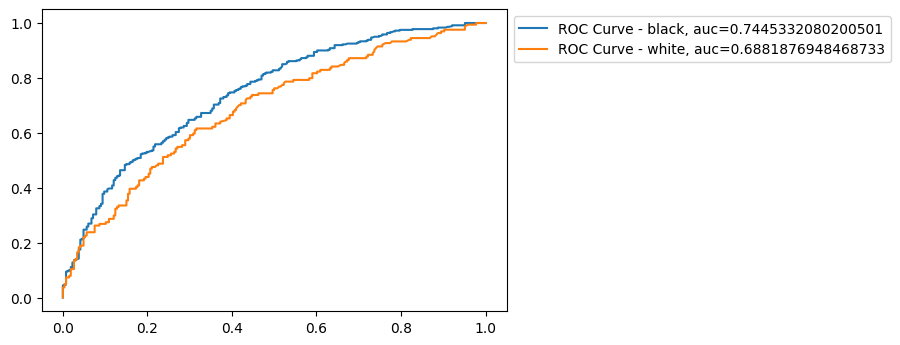

In [472]:
import matplotlib.pyplot as plt
from sklearn import metrics

from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

blackPreds = dnnmodel(test_x_black).detach()
whitePreds = dnnmodel(test_x_white).detach()

fpr_m, tpr_m, thresholds_m = metrics.roc_curve(test_y_black, blackPreds)
auc = metrics.roc_auc_score(test_y_black, blackPreds)
plt.plot(fpr_m,tpr_m,label="ROC Curve - black, auc="+str(auc))

fpr_f, tpr_f, thresholds_f = metrics.roc_curve(test_y_white, whitePreds)
auc = metrics.roc_auc_score(test_y_white, whitePreds)
plt.plot(fpr_f,tpr_f,label="ROC Curve - white, auc="+str(auc))

# lr_prediction_black_threshold = lr_prediction_black.applymap(lambda x: 1 if x > minBlackThreshold else 0)
# lr_prediction_white_threshold = lr_prediction_white.applymap(lambda x: 1 if x > minWhiteThreshold else 0)


# ax.scatter(bfp/(bfp + btn), btp/(btp + bfn), c='black', marker='^', s=100, label='Max Profit Black')
# ax.scatter(wfp/(wfp + wtn), wtp/(wtp + wfn), c='green', marker='^', s= 100, label="Max Profit White")

plt.legend(loc=0, bbox_to_anchor=(1,1))

#### Q5: (i) Do a calibration plot that plots the fraction of defendants recidividating within two years as a function of the predicted probability of recidivism, for black defendants and white defendants. (ii) Comment (in a couple of sentences) if you believe that the score satisfies sufficiency across racial groups.      (5 points)

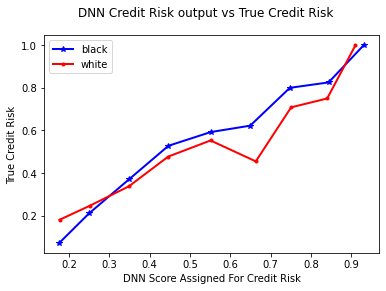

In [473]:
# YOUR CODE HERE 
from sklearn.calibration import calibration_curve
y_m, x_m = calibration_curve(
    test_y_black, 
    blackPreds, 
    n_bins=10)

y_f, x_f = calibration_curve(
    test_y_white, 
    whitePreds, 
    n_bins=10)






fig, ax = plt.subplots()

plt.plot(x_m, y_m, color='blue', 
         marker='*', 
         linewidth = 2, 
         label='black')

plt.plot(x_f, y_f, color='red', 
         marker='.', 
         linewidth = 2, 
         label='white')



# # reference line, legends, and axis labels
ax.set_xlabel('DNN Score Assigned For Credit Risk')
ax.set_ylabel('True Credit Risk')
fig.suptitle('DNN Credit Risk output vs True Credit Risk')
plt.legend()
plt.show()







Being sufficient means $Y \perp A \mid R$.  Sufficiency doesn't hold here, as whites are getting predicted to have higher credit risk even when their true credit risk isn't as high (the lines don't match up).  So, whites are getting discriminated against.

#### Q6: (i) Plot the distributions of scores received by the positive class (recidivists) and the distribution of scores received by the negative class (non-recidivists) for black and white defendants. (ii) Based on these plots, comment (in a couple of sentences) if this score satisfies separation.  (5 points)

/var/folders/3k/nhgpsd_x0y5111nl043x8tgh0000gn/T/ipykernel_72239/236127872.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(whiteLowRiskPreds,
/var/folders/3k/nhgpsd_x0y5111nl043x8tgh0000gn/T/ipykernel_72239/236127872.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(blackLowRiskPreds,
/v

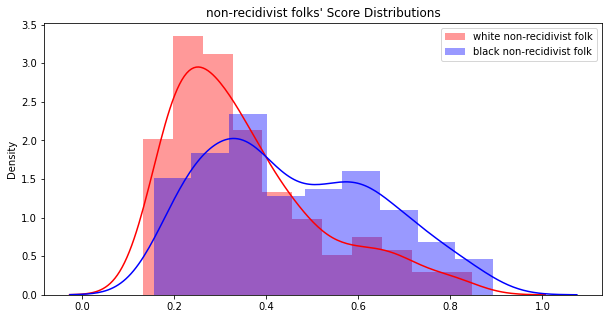

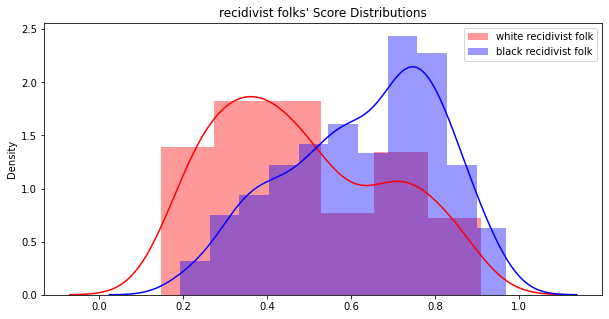

In [474]:
# YOUR CODE HERE

#print (test_y_white.head())

def makeSeparationGraphs(model, test_x_black_lowrisk, test_x_black_highrisk, test_x_white_lowrisk, test_x_white_highrisk):
    blackLowRiskPreds = model(test_x_black_lowrisk).detach()
    blackHighRiskPreds = model(test_x_black_highrisk).detach()

    whiteLowRiskPreds = model(test_x_white_lowrisk).detach()
    whiteHighRiskPreds = model(test_x_white_highrisk).detach()

    import seaborn as sns
    plt.figure(figsize=(10,5))
    sns.distplot(whiteLowRiskPreds, 
                 color="red", 
                 label="white non-recidivist folk").set(title = "non-recidivist folks' Score Distributions")
    sns.distplot(blackLowRiskPreds, 
                 color="blue", 
                 label="black non-recidivist folk").set(title = "non-recidivist folks' Score Distributions")
    plt.legend()

    plt.figure(figsize=(10,5))
    sns.distplot(whiteHighRiskPreds, 
                 color="red", 
                 label="white recidivist folk").set(title = "recidivist folks' Score Distributions")
    sns.distplot(blackHighRiskPreds, 
                 color="blue", 
                 label="black recidivist folk").set(title = "recidivist folks' Score Distributions")
    plt.legend()
    
makeSeparationGraphs(dnnmodel, test_x_black_lowrisk, test_x_black_highrisk, test_x_white_lowrisk, test_x_white_highrisk)





Separation means that $R \perp A \mid Y$.  So given the true label of recidivism, the logistic regression output must be independent of the race sensitive variable $A$.  This does NOT satisfy separation, because for both labels (non-recidivists and recidivists), we can see that the model outputted significantly lower scores for white people.

In [543]:
def falseaLossTrueLossSeparationHelper(model, data, labels, verbose=True, test_data = True):
    data = pd.DataFrame(data.numpy())
    labels = pd.DataFrame(labels.numpy())
    raceIndex = 2
    xd = data[raceIndex] < 0
    dx = (labels == 1).squeeze()

    tempData = temptest_x
    if test_data == False:
        tempData = temptrain_x
    

    whiteTrueData = data[(tempData['race'] == 0).reset_index(drop=True) & (labels == 1).squeeze()]
    whiteFalseData = data[(tempData['race'] == 0).reset_index(drop=True) & (labels == 0).squeeze()]

    blackTrueData = data[(tempData['race'] == 1).reset_index(drop=True) & (labels == 1).squeeze()]
    blackFalseData = data[(tempData['race'] == 1).reset_index(drop=True) & (labels == 0).squeeze()]
    
    #print (len(temptest_x))
    
    #print (len(whiteData), len(blackData))
    
    #print (whiteFalseData)
    #print (blackFalseData)
    
    #print (len(whiteTrueData), len(whiteFalseData), len(blackTrueData), len(blackFalseData))
    
    whiteTrueData = torch.tensor(whiteTrueData.values)
    whiteFalseData = torch.tensor(whiteFalseData.values)
    
    blackTrueData = torch.tensor(blackTrueData.values)
    blackFalseData = torch.tensor(blackFalseData.values)
    
    whiteTruePreds = model(whiteTrueData)
    whiteFalsePreds = model(whiteFalseData)
    
    blackTruePreds = model(blackTrueData)
    blackFalsePreds = model(blackFalseData)
    
    whiteTruePosProb = (torch.sum(whiteTruePreds.round())/len(whiteTrueData))
    whiteFalsePosProb = (torch.sum(whiteFalsePreds.round())/len(whiteFalseData))
    
    blackTruePosProb = (torch.sum(blackTruePreds.round())/len(blackTrueData))
    blackFalsePosProb = (torch.sum(blackFalsePreds.round())/len(blackFalseData))
    
    print ("whiteTruePosProb(prob of marking a high risk white): ", whiteTruePosProb.detach())
    print ("blackTruePosProb(prob of marking a high risk black): ", blackTruePosProb.detach())

    print ("whiteFalsePosProb(prob of marking a low risk white): ", whiteFalsePosProb.detach())    
    print ("blackFalsePosProb(prob of marking a low risk black): ", blackFalsePosProb.detach())
    
    falseLoss = abs(whiteFalsePosProb - blackFalsePosProb)
    trueLoss = abs(whiteTruePosProb - blackTruePosProb)
    
    # R = model output
    # A = race (0 = white), (1 = black)
    # Y = 0 (low risk), Y = 1 (high risk)
    
    if verbose:
        print ("|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| = ", falseLoss.item())
        print ("|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| = ", trueLoss.item())
    return falseLoss.item(), trueLoss.item()

def paritySum(model, data, labels):
    fpParity, tpParity = falseaLossTrueLossSeparationHelper(model, data, labels)
    return fpParity + tpParity
    
def maxSeparation(model, data, labels):
    res = falseaLossTrueLossSeparationHelper(model, data, labels)
    return max(res[0], res[1])
    
def separation(model, data, labels):
    maxSep = maxSeparation(model, data, labels)
    eps = 0.05
    return (maxSep < eps)

def separationLoss(model, data, labels):
    falseLoss, trueLoss = falseaLossTrueLossSeparationHelper(model, data, labels, verbose=False)
    return falseLoss + trueLoss

print ("Does the model satisfy separation: ", separation(dnnmodel, test_x, test_y))

whiteTruePosProb(prob of marking a high risk white):  tensor(0.4024)
blackTruePosProb(prob of marking a high risk black):  tensor(0.7556)
whiteFalsePosProb(prob of marking a low risk white):  tensor(0.1729)
blackFalsePosProb(prob of marking a low risk black):  tensor(0.4098)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.2368420958518982
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.35311654210090637
Does the model satisfy separation:  False


In [476]:
# creating new dataset

raceX = Data.drop(columns=['is_recid', 'race'])
raceY = Data['race']

racetrain_x, racetest_x, racetrain_y, racetest_y = train_test_split(raceX, raceY, test_size=0.2, random_state=137)

scaler = sklearn.preprocessing.StandardScaler()
racetrain_x = scaler.fit_transform(racetrain_x)
racetest_x = scaler.transform(racetest_x)

racetrain_x = torch.from_numpy(racetrain_x.astype(np.float32))
racetest_x = torch.from_numpy(racetest_x.astype(np.float32))

# Train_y is now a numpy object 
racetrain_y = list(racetrain_y)

# train_y is now a torch object 
racetrain_y = torch.as_tensor(racetrain_y, dtype = torch.float32)
racetest_y = torch.as_tensor(list(racetest_y), dtype=torch.float32)

racetrain_y = racetrain_y.view(racetrain_y.shape[0],1)
racetest_y = racetest_y.view(racetest_y.shape[0],1)

n_samples,n_features=racetrain_x.shape


In [552]:
from copy import deepcopy

batch_size = 10
raceTrainData = Dataset(racetrain_x, racetrain_y)
raceTrainDataLoader = torch.utils.data.DataLoader(raceTrainData, shuffle=True, batch_size=batch_size)
raceTestData = Dataset(racetest_x, racetest_y)
raceTestDataLoader = torch.utils.data.DataLoader(raceTestData, shuffle=True, batch_size=batch_size)


'''for child in dnnmodel.seq.children():
    for param in child.parameters():
        print (param)'''

savedModel = deepcopy(dnnmodel)

class RaceDNNModel(torch.nn.Module):
    def __init__(self, savedModel):
        super(RaceDNNModel,self).__init__()
        self.seq = savedModel.seq
        
        self.racelayer1 = torch.nn.Linear(50,50)
        self.racelayer2 = torch.nn.Linear(50,50)
        self.racelayer3 = torch.nn.Linear(50,1)
            
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        
        self.raceseq = torch.nn.Sequential(
            self.racelayer3,
            self.sigmoid
        )
        
        
        for child in self.seq.children():
            for param in child.parameters():
                #print (param)
                param.requires_grad = False

        self.seq.eval()
    
    def forward(self, x):
        return self.raceseq(self.seq(x))
        
racednnmodel = RaceDNNModel(savedModel)

racednnepochs = 15
racednnlr = 1e-4
def BCELoss_class_weighted(weights):
    def loss(input, target):
        input = torch.clamp(input,min=1e-7,max=1-1e-7)
        bce = - weights[1] * target * torch.log(input) - (1 - target) * weights[0] * torch.log(1 - input)
        return torch.mean(bce)
    return loss


criterion = BCELoss_class_weighted(weights = [2*race0weight, 2*race1weight])
racednnoptimizer = torch.optim.Adam([param for param in racednnmodel.parameters() if param.requires_grad == True], lr=racednnlr, weight_decay = 1e-5)
for epoch in range(racednnepochs):
    #print ("hey")
    print ("epoch", epoch)
    train(epoch, racednnmodel, raceTrainDataLoader, racednnoptimizer, criterion, raceTestDataLoader)

print(accuracy(racednnmodel, racetest_x, test_y = racetest_y))
print(accuracy(racednnmodel, racetest_x))

print(racetest_y)
torch.save(racednnmodel, "racednnmodel.pt")





epoch 0
Epoch: 0 	Training Loss: 0.632349 	Validation Loss: 0.622425
epoch 1
Epoch: 1 	Training Loss: 0.625360 	Validation Loss: 0.614701
epoch 2
Epoch: 2 	Training Loss: 0.621006 	Validation Loss: 0.610433
epoch 3
Epoch: 3 	Training Loss: 0.619479 	Validation Loss: 0.606242
epoch 4
Epoch: 4 	Training Loss: 0.617608 	Validation Loss: 0.604662
epoch 5
Epoch: 5 	Training Loss: 0.616783 	Validation Loss: 0.603270
epoch 6
Epoch: 6 	Training Loss: 0.616275 	Validation Loss: 0.602284
epoch 7
Epoch: 7 	Training Loss: 0.617285 	Validation Loss: 0.602032
epoch 8
Epoch: 8 	Training Loss: 0.615592 	Validation Loss: 0.601872
epoch 9
Epoch: 9 	Training Loss: 0.615533 	Validation Loss: 0.600356
epoch 10
Epoch: 10 	Training Loss: 0.615573 	Validation Loss: 0.600419
epoch 11
Epoch: 11 	Training Loss: 0.615596 	Validation Loss: 0.600078
epoch 12
Epoch: 12 	Training Loss: 0.614880 	Validation Loss: 0.599719
epoch 13
Epoch: 13 	Training Loss: 0.614750 	Validation Loss: 0.599876
epoch 14
Epoch: 14 	Traini

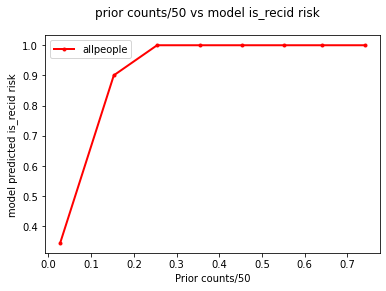

In [478]:
y_t, x_pc = calibration_curve(
    dnnmodel.forward(train_x).detach().round(),
    [x/50 for x in temptrain_x['priors_count']],
    n_bins=10
)

fig, ax = plt.subplots()

plt.plot(x_pc, y_t, color='red', 
         marker='.', 
         linewidth = 2, 
         label='allpeople')



# # reference line, legends, and axis labels
ax.set_xlabel('Prior counts/50')
ax.set_ylabel('model predicted is_recid risk')
fig.suptitle('prior counts/50 vs model is_recid risk')
plt.legend()
plt.show()


Average Feature Importances
age :  0.017
sex :  0.002
juv_fel_count :  0.004
decile_score :  -0.003
priors_count :  -0.031
v_decile_score :  0.001


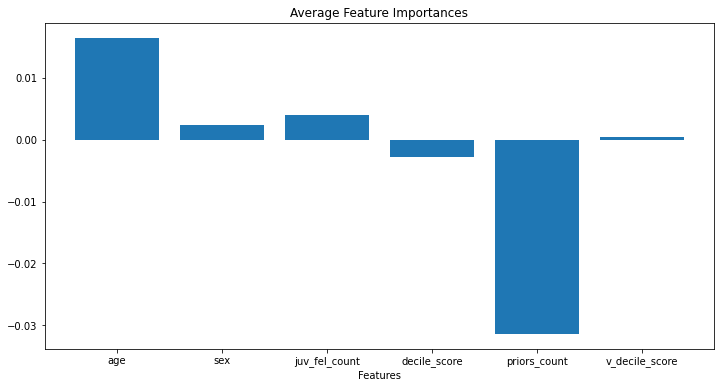

In [479]:
from captum.insights.attr_vis.features import GeneralFeature
from captum.insights import AttributionVisualizer, Batch

from captum.attr import IntegratedGradients, DeepLift
from captum.attr import LayerConductance
from captum.attr import NeuronConductance


def baseline_func(input):
    return input * 0

def formatted_data_iter(testDataLoader):
    dataloader = iter(testDataLoader)
    while True:
        images, labels = next(dataloader)
        yield Batch(inputs=images, labels=labels)

'''GeneralFeature("sex"),
        GeneralFeature("juv_fel_count"),
        GeneralFeature("decile_score"),
        GeneralFeature("priors_count"),
        GeneralFeature("v_decile_score")'''

ig = IntegratedGradients(racednnmodel)

test_input_tensor = deepcopy(test_x)

test_input_tensor.requires_grad_()

#print (test_input_tensor)
attr, delta = ig.attribute(test_input_tensor, return_convergence_delta=True)
attr = attr.detach().numpy()

# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
        
feature_names = "age sex juv_fel_count decile_score priors_count v_decile_score".split(" ")

#print (feature_names)
        
visualize_importances(feature_names, np.mean(attr, axis=0))



Average Neuron Importances For Hidden Layer 1
0 :  0.000
1 :  0.009
2 :  -0.000
3 :  -0.001
4 :  0.016
5 :  -0.004
6 :  -0.001
7 :  -0.006
8 :  0.000
9 :  0.002
10 :  -0.004
11 :  0.001
12 :  0.000
13 :  -0.006
14 :  -0.000
15 :  0.001
16 :  -0.009
17 :  -0.005
18 :  -0.001
19 :  -0.002
20 :  0.001
21 :  -0.004
22 :  0.004
23 :  -0.004
24 :  0.000
25 :  -0.002
26 :  -0.001
27 :  0.005
28 :  0.000
29 :  -0.000
30 :  0.000
31 :  -0.004
32 :  0.001
33 :  0.002
34 :  -0.000
35 :  -0.000
36 :  -0.011
37 :  0.001
38 :  0.006
39 :  -0.003
40 :  -0.011
41 :  -0.003
42 :  0.001
43 :  0.004
44 :  0.003
45 :  0.003
46 :  0.003
47 :  -0.003
48 :  0.009
49 :  0.001
Average Neuron Importances For Hidden Layer 2
0 :  -0.000
1 :  -0.000
2 :  -0.001
3 :  -0.004
4 :  0.004
5 :  -0.001
6 :  0.005
7 :  0.001
8 :  0.003
9 :  0.001
10 :  0.006
11 :  0.003
12 :  -0.002
13 :  0.005
14 :  -0.002
15 :  0.005
16 :  0.002
17 :  0.001
18 :  -0.000
19 :  -0.001
20 :  -0.000
21 :  -0.001
22 :  -0.001
23 :  0.000
24 

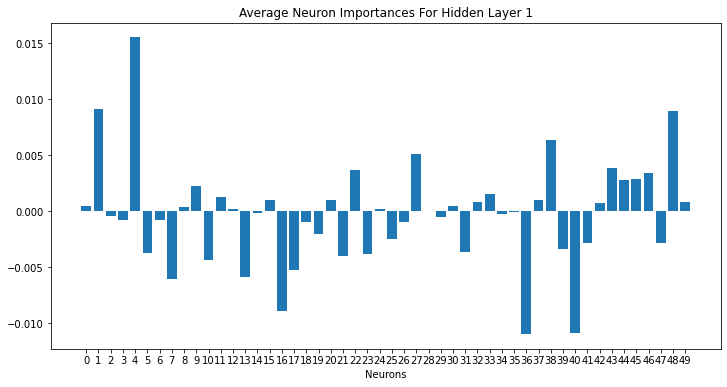

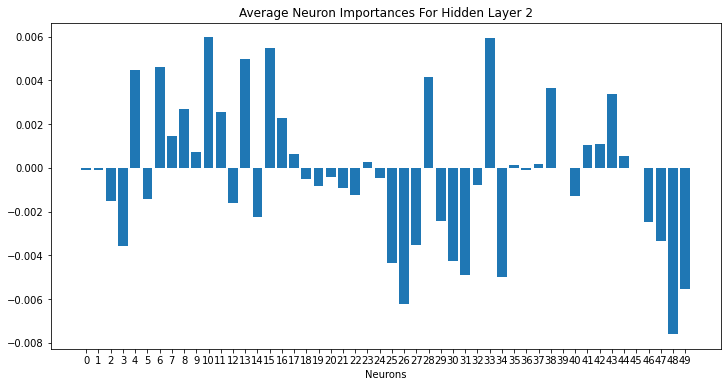

In [480]:
# Layer Conductance

cond = LayerConductance(racednnmodel, racednnmodel.seq[1]) # relu1
cond_vals = cond.attribute(test_input_tensor,target=0)
cond_vals = cond_vals.detach().numpy()
visualize_importances(range(50),np.mean(cond_vals, axis=0),title="Average Neuron Importances For Hidden Layer 1", axis_title="Neurons")

cond2 = LayerConductance(racednnmodel, racednnmodel.seq[3]) # relu2
cond_vals2 = cond2.attribute(test_input_tensor,target=0)
cond_vals2 = cond_vals2.detach().numpy()
visualize_importances(range(50),np.mean(cond_vals2, axis=0),title="Average Neuron Importances For Hidden Layer 2", axis_title="Neurons")



Average Feature Importances for Output Neuron0
age :  0.016
sex :  0.002
juv_fel_count :  0.004
decile_score :  -0.003
priors_count :  -0.031
v_decile_score :  0.001


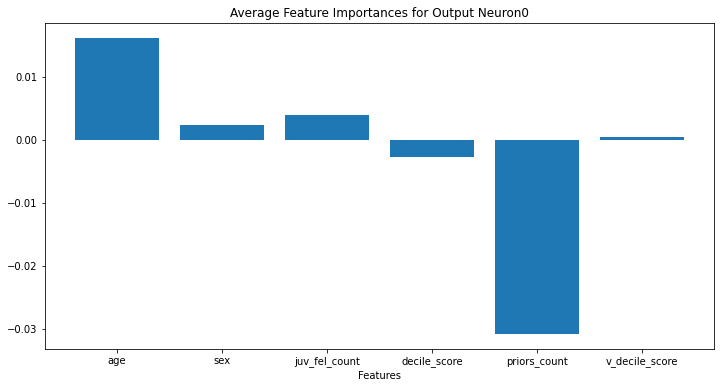

In [481]:
output_neuron_cond = NeuronConductance(racednnmodel, racednnmodel.sigmoid)
output_neuron_cond_vals = output_neuron_cond.attribute(test_input_tensor, neuron_selector=0, target=0)
visualize_importances(feature_names, output_neuron_cond_vals.mean(dim=0).detach().numpy(), title="Average Feature Importances for Output Neuron0")



OG Model Evaled on Med Accuracy:  0.6590909361839294
OG Model Evaled on Med Utility:  0.6587269700969982


(0.6590909361839294, 0.6587269700969982)

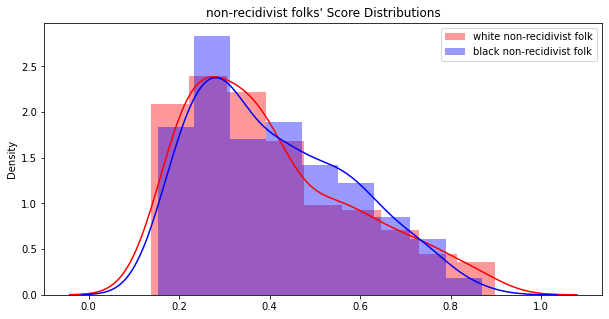

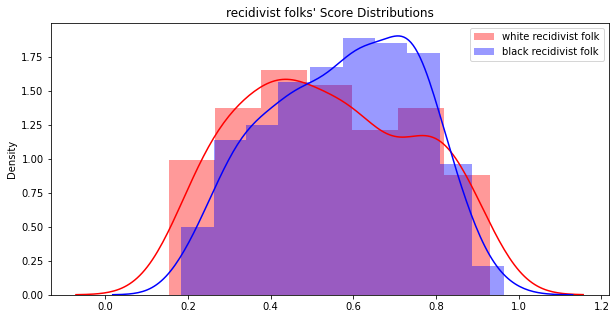

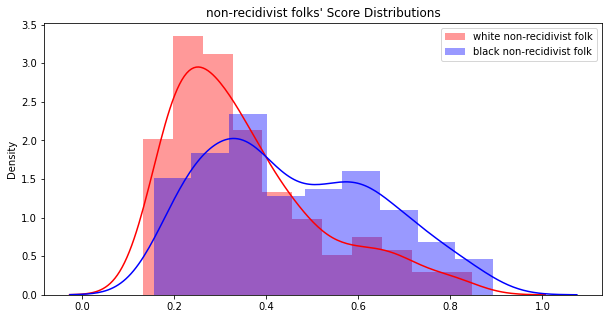

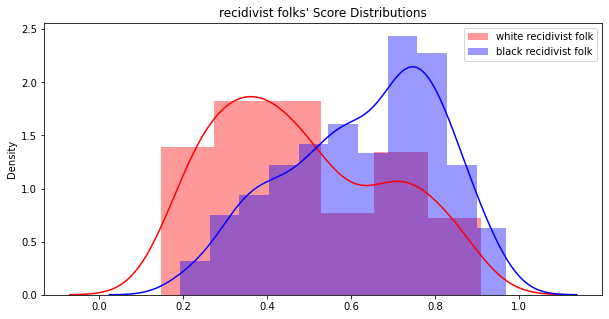

In [535]:
# median operation on input features

import warnings
warnings.filterwarnings('ignore')
import statistics

def getMedData(repLambda, sepGraphsShow = True):
    def upperbinsearch(arr, x):
        low = 0
        high = len(arr)
        while low + 1 < high:
            mid = low + (high - low)//2
            if arr[mid] <= x:
                low = mid
            else:
                high = mid
        return low

    def lowerbinsearch(arr, x):
        low = 0
        high = len(arr)
        while low + 1 < high:
            mid = low + (high - low)//2
            if arr[mid] < x:
                low = mid
            else:
                high = mid
        if high < len(arr) and arr[high] <= x:
            return high
        else:
            return low

    def calculatePercentile(arr, x):
        lowerbinresult = lowerbinsearch(arr, x)
        upperbinresult = upperbinsearch(arr, x)
        avgresult = (lowerbinresult + upperbinresult)/2
        return avgresult/len(arr)



    def convertDataset(groupsCopy, valsToSortedList, featureImportances, df_input = False):
        groups = deepcopy(groupsCopy)

        numFeatures = groups[0].shape[1]
        bd = None
        wd = None
        bd = pd.DataFrame(groups[0].numpy())
        wd = pd.DataFrame(groups[1].numpy())

        featureImportancesSorted = sorted([abs(robot) for robot in featureImportances], reverse = True)
        maxImportance = featureImportancesSorted[0]

        groupNames = [("black", bd), ("white", wd)]

        for tup in groupNames:
            curGroup = tup[0]
            data = tup[1]
            for dataCounter in range(len(data)):
                row = data.iloc[dataCounter]

                for i in range(numFeatures):
                    #print(valsToSortedList[i][curGroup])
                    percentile = calculatePercentile(valsToSortedList[i][curGroup], data.at[dataCounter, i])
                    allGroupsAtPercentile = list()
                    for group in valsToSortedList[i]:
                        groupArr = valsToSortedList[i][group]
                        valForGroup = groupArr[min(int(percentile * len(groupArr)), len(groupArr) - 1)]
                        allGroupsAtPercentile.append(valForGroup)

                    medianVal = statistics.median(allGroupsAtPercentile)

                    # replace value with weighted average of median and original value
                    #weight = 0
                    ftimp = (abs(featureImportances[i])/maxImportance)
                    weight = repLambda + (1-repLambda)*(abs(featureImportances[i])/maxImportance)
                    origVal = data.at[dataCounter, i]
                    data.at[dataCounter, i] = (weight*medianVal) + ((1 - weight)*origVal)
        return (bd, wd)

    def getFeatureDistributions(groups, df_input = False):

        #valsToSortedList = defaultdict(lambda: dict()) # maps sensitive attribute value to a map of columns to sorted lists
        numFeatures = groups[0].shape[1]
        valsToSortedList = [dict() for i in range(numFeatures)]

        bd = None
        wd = None
        if df_input == False:
            bd = pd.DataFrame(groups[0].numpy())
            wd = pd.DataFrame(groups[1].numpy())
        else:
            bd = groups[0]
            wd = groups[1]
        for i in range(numFeatures): # loop over all features

            whiteCol = wd.iloc[:,i].to_numpy().tolist()
            whiteCol.sort()

            blackCol = bd.iloc[:,i].to_numpy().tolist()
            blackCol.sort()

            valsToSortedList[i]['black'] = blackCol
            valsToSortedList[i]['white'] = whiteCol

        return valsToSortedList


    valsToSortedList = getFeatureDistributions([train_x_black, train_x_white])

    test_x_black_df, test_x_white_df = convertDataset([test_x_black, test_x_white], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    dtype = test_x_black.dtype

    test_x_black_med, test_x_white_med = torch.tensor(test_x_black_df.values, dtype = dtype), torch.tensor(test_x_white_df.values, dtype = dtype)

    train_x_black_df, train_x_white_df = convertDataset([train_x_black, train_x_white], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    train_x_black_med, train_x_white_med = torch.tensor(train_x_black_df.values, dtype = dtype), torch.tensor(train_x_white_df.values, dtype = dtype)


    test_x_black_lowrisk_df, test_x_white_lowrisk_df = convertDataset([test_x_black_lowrisk, test_x_white_lowrisk], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    test_x_black_highrisk_df, test_x_white_highrisk_df = convertDataset([test_x_black_highrisk, test_x_white_highrisk], valsToSortedList, output_neuron_cond_vals.mean(dim=0).detach().numpy().tolist())
    test_x_black_lowrisk_med, test_x_white_lowrisk_med = torch.tensor(test_x_black_lowrisk_df.values, dtype=dtype), torch.tensor(test_x_white_lowrisk_df.values, dtype=dtype)
    test_x_black_highrisk_med, test_x_white_highrisk_med = torch.tensor(test_x_black_highrisk_df.values, dtype=dtype), torch.tensor(test_x_white_highrisk_df.values, dtype=dtype)

    if sepGraphsShow == True:
        makeSeparationGraphs(dnnmodel, test_x_black_lowrisk_med, test_x_black_highrisk_med, test_x_white_lowrisk_med, test_x_white_highrisk_med)
        makeSeparationGraphs(dnnmodel, test_x_black_lowrisk, test_x_black_highrisk, test_x_white_lowrisk, test_x_white_highrisk)

    def mergeDatasets(black, white, trainData = False):
        data = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
        newdataframe = pd.DataFrame(data)  
        blackPointer = 0
        whitePointer = 0
        mask = None
        if trainData:
            mask = (temptrain_x['race'] == 1)
        else:
            mask = (temptest_x['race'] == 1)
        for row in mask:
            if row == False:
                # white
                toAppend = white.iloc[whitePointer]
                newdataframe.loc[whitePointer + blackPointer] = toAppend
                whitePointer += 1
            else:
                # black     
                toAppend = black.iloc[blackPointer]
                newdataframe.loc[whitePointer + blackPointer] = toAppend
                blackPointer += 1
        return newdataframe

    test_x_med_df = mergeDatasets(test_x_black_df, test_x_white_df)
    train_x_med_df = mergeDatasets(train_x_black_df, train_x_white_df, trainData = True)
    test_x_med = torch.tensor(test_x_med_df.values, dtype = test_x.dtype)
    train_x_med = torch.tensor(train_x_med_df.values, dtype = train_x.dtype)

    return train_x_med,test_x_med

train_x_med, test_x_med = getMedData(repLambda = 0.5)
evaluateModel(dnnmodel, test_x_med, "OG Model Evaled on Med")





In [532]:
print ("Does the model satisfy separation: ", separation(dnnmodel, test_x_med, test_y))

whiteTruePosProb(prob of marking a high risk white):  tensor(0.5305)
blackTruePosProb(prob of marking a high risk black):  tensor(0.6472)
whiteFalsePosProb(prob of marking a low risk white):  tensor(0.2782)
blackFalsePosProb(prob of marking a low risk black):  tensor(0.3083)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.030075162649154663
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.11673444509506226
Does the model satisfy separation:  False


epoch 0
Epoch: 0 	Training Loss: 0.668761 	Validation Loss: 0.637951
epoch 1
Epoch: 1 	Training Loss: 0.611257 	Validation Loss: 0.616217
epoch 2
Epoch: 2 	Training Loss: 0.602422 	Validation Loss: 0.615142
epoch 3
Epoch: 3 	Training Loss: 0.598889 	Validation Loss: 0.615148
epoch 4
Epoch: 4 	Training Loss: 0.598666 	Validation Loss: 0.614101
epoch 5
Epoch: 5 	Training Loss: 0.598205 	Validation Loss: 0.613222
epoch 6
Epoch: 6 	Training Loss: 0.596324 	Validation Loss: 0.613639
epoch 7
Epoch: 7 	Training Loss: 0.595085 	Validation Loss: 0.614639
epoch 8
Epoch: 8 	Training Loss: 0.594455 	Validation Loss: 0.612945
epoch 9
Epoch: 9 	Training Loss: 0.595207 	Validation Loss: 0.612123
epoch 10
Epoch: 10 	Training Loss: 0.593460 	Validation Loss: 0.612843
epoch 11
Epoch: 11 	Training Loss: 0.594352 	Validation Loss: 0.614073
epoch 12
Epoch: 12 	Training Loss: 0.593196 	Validation Loss: 0.613114
epoch 13
Epoch: 13 	Training Loss: 0.592870 	Validation Loss: 0.611395
epoch 14
Epoch: 14 	Traini

(0.6590909361839294, 0.6587269700969982)

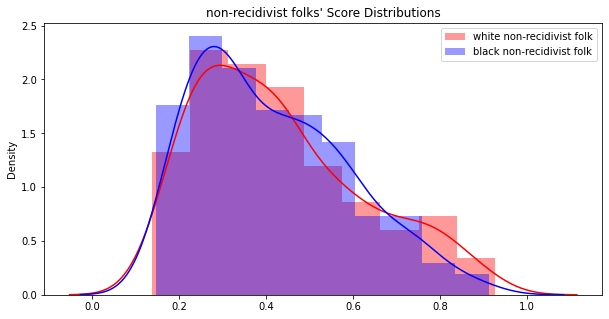

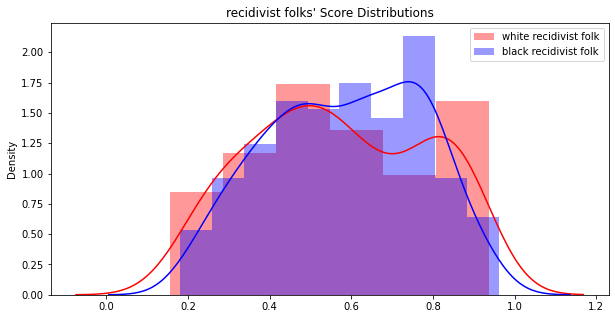

In [537]:
def retrainModelOnMedData(train_x_med, test_x_med, sepGraphsShow = True):
    batch_size = 10
    trainSignDataMed = Dataset(train_x_med, train_y)
    trainDataLoaderMed = torch.utils.data.DataLoader(trainSignDataMed, shuffle=True, batch_size=batch_size)
    testSignDataMed = Dataset(test_x_med, test_y)
    testDataLoaderMed = torch.utils.data.DataLoader(testSignDataMed, shuffle=True, batch_size=batch_size)
    
    dnnmodelmed = DNN_model(train_x_med.shape[1])
    dnnepochs = 15
    dnnlr = 1e-4
    criterion = torch.nn.BCELoss()
    dnnoptimizermed = torch.optim.Adam(dnnmodelmed.parameters(), lr=dnnlr, weight_decay=1e-5)
    for epoch in range(dnnepochs):
        #print ("hey")
        print ("epoch", epoch)
        train(epoch, dnnmodelmed, trainDataLoaderMed, dnnoptimizermed, criterion, testDataLoaderMed)

    torch.save(dnnmodelmed, "dnnmodelmed.pt")
    if sepGraphsShow:
        makeSeparationGraphs(dnnmodelmed, test_x_black_lowrisk_med, test_x_black_highrisk_med, test_x_white_lowrisk_med, test_x_white_highrisk_med)
    return dnnmodelmed

dnnmodelmed = retrainModelOnMedData(train_x_med, test_x_med)
evaluateModel(dnnmodelmed, test_x_med, "retrained model")



In [514]:
print ("Does the retrained model satisfy separation: ", separation(dnnmodelmed, test_x_med, test_y))

whiteTruePosProb(prob of marking a high risk white):  tensor(0.6159)
blackTruePosProb(prob of marking a high risk black):  tensor(0.6639)
whiteFalsePosProb(prob of marking a low risk white):  tensor(0.3271)
blackFalsePosProb(prob of marking a low risk black):  tensor(0.3158)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.011278212070465088
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.04803520441055298
Does the model satisfy separation:  True


## Experiment section

Set different lambdas for the partial repair, plot fairness (TP-Parity + FP-Parity) vs balanced accuracy tradeoff.

0
whiteTruePosProb(prob of marking a high risk white):  tensor(0.5000)
blackTruePosProb(prob of marking a high risk black):  tensor(0.6722)
whiteFalsePosProb(prob of marking a low risk white):  tensor(0.2594)
blackFalsePosProb(prob of marking a low risk black):  tensor(0.3383)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.07894736528396606
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.17222219705581665
0.05
whiteTruePosProb(prob of marking a high risk white):  tensor(0.5000)
blackTruePosProb(prob of marking a high risk black):  tensor(0.6694)
whiteFalsePosProb(prob of marking a low risk white):  tensor(0.2707)
blackFalsePosProb(prob of marking a low risk black):  tensor(0.3383)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.06766915321350098
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.16944444179534912
0.1
whiteTruePosProb(prob of marking a high risk white):  tensor(0.5061)
blackTruePosProb(prob of marking a high risk black):  tensor(0.6639)

whiteTruePosProb(prob of marking a high risk white):  tensor(0.5549)
blackTruePosProb(prob of marking a high risk black):  tensor(0.6167)
whiteFalsePosProb(prob of marking a low risk white):  tensor(0.2895)
blackFalsePosProb(prob of marking a low risk black):  tensor(0.2744)
|P(R = 1 | A = 1, Y = 0) - P(R = 1 | A = 0, Y = 0)| =  0.015037596225738525
|P(R = 1 | A = 1, Y = 1) - P(R = 1 | A = 0, Y = 1)| =  0.06178861856460571


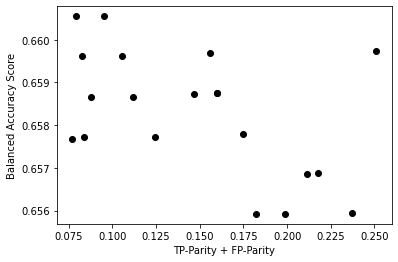

In [545]:
import numpy as np
import matplotlib.pyplot as plt

def makeAccuracyFairnessGraph(model, stepSize = 0.05):
    # Fixing random state for reproducibility
    np.random.seed(19680801)


    x = []
    y = []
    repLambda = 0
    while repLambda <= 1:
        print (repLambda)
        train_x_med, test_x_med = getMedData(repLambda, sepGraphsShow = False)
        acc, ut = evaluateModel(model, test_x_med, verbose=False)
        p = paritySum(model, test_x_med, test_y)
        x.append(p)
        y.append(ut)
        
        repLambda += stepSize

    plt.scatter(x, y, c='black')
    plt.xlabel("TP-Parity + FP-Parity")
    plt.ylabel("Balanced Accuracy Score")
    plt.show()

makeAccuracyFairnessGraph(dnnmodel)


In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(15, 20))

feature_names.append('race')
for i, (ax, col) in enumerate(zip(axs.flat, feature_names)):
    print (i, (ax,col))
    x = Data[col]
    y = Y
    #x = X[:,i]
    pf = np.polyfit(x, y, 1)
    p = np.poly1d(pf)

    ax.plot(x, y, 'o')
    ax.plot(x, p(x),"r--")

    ax.set_title(col + ' vs is_recid')
    ax.set_xlabel(col)
    ax.set_ylabel('is_recid')